### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [136]:
import numpy as np
import pandas as pd

data = pd.read_csv('../data/processed_data_with_new_features.csv', index_col='id')

In [137]:
data.head(20)

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id0801584,1,1061.355223,0,1.100107,6.095825,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
id1813257,0,1053.529749,0,1.327852,5.834811,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
id1324603,1,930.399753,0,5.722427,7.347300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
id1301050,0,930.399753,0,1.311541,5.545177,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [138]:
import matplotlib.pyplot as plt
plt.style.use ('dark_background')

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 2

mlp.rcParams['xtick.major.size'] = 12
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 6
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 12
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 6
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 10
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [139]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

### Your code is here

data.isna().sum().to_frame()

,0
vendor_id,0
passenger_count,145864
store_and_fwd_flag,0
distance_km,145864
log_trip_duration,0
anomaly,0
traffic_jam,0
day_of_week_1,0
day_of_week_2,0
day_of_week_3,0


Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [140]:
### Your code is here

passenger_count_most_popular_val = data.groupby('passenger_count')['passenger_count'].size().sort_values(ascending=False).index[0]
data['passenger_count'] = data['passenger_count'].fillna(passenger_count_most_popular_val)
print(round(passenger_count_most_popular_val, 2))

930.4


С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [141]:
### Your code is here

grouped_means = data.groupby([
    data['vendor_id'],
    data['store_and_fwd_flag'],
    data['traffic_jam'],
    data['month_2'],
    data['month_3'],
    data['month_4'],
    data['month_5'],
    data['month_6']
])['distance_km'].transform('mean')

data['distance_km'] = data['distance_km'].fillna(grouped_means)


In [142]:
### Убедимся, что пропусков не осталось

### Your code is here

file_path = '../data/less_8_task_7.csv'
data.head(20).to_csv(file_path, sep=';', index=False)
df = pd.read_csv(file_path, sep=';')
df

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
0,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,1061.355223,0,1.100107,6.095825,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,1053.529749,0,1.327852,5.834811,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,1,930.399753,0,5.722427,7.347300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,930.399753,0,1.311541,5.545177,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,1,930.399753,0,5.126939,7.111512,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [143]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

### Your code is here

X = data.drop(columns=['log_trip_duration'], axis=1)
Y = data['log_trip_duration']

selector.split(X)
losses_test = []

for train_index, test_index in selector.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]

    model = LinearRegression()
    model.fit(X_train, Y_train)

    losses_test.append(np.mean((model.predict(X_test) - Y_test)**2))

cross_val_error = np.mean(losses_test)

print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

MSLE на Кросс-валидации: 0.431


In [144]:
# Альтернатива через cross_validate

from sklearn.model_selection import cross_validate

selector = KFold(n_splits=4, shuffle=True, random_state=33)

X = data.drop(columns=['log_trip_duration'], axis=1)
Y = data['log_trip_duration']

model = LinearRegression()

cv_results = cross_validate(model, X, Y, cv=selector, scoring='neg_mean_squared_error', return_train_score=False)

cross_val_error = np.mean(-cv_results['test_score'])

print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

MSLE на Кросс-валидации: 0.431


### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

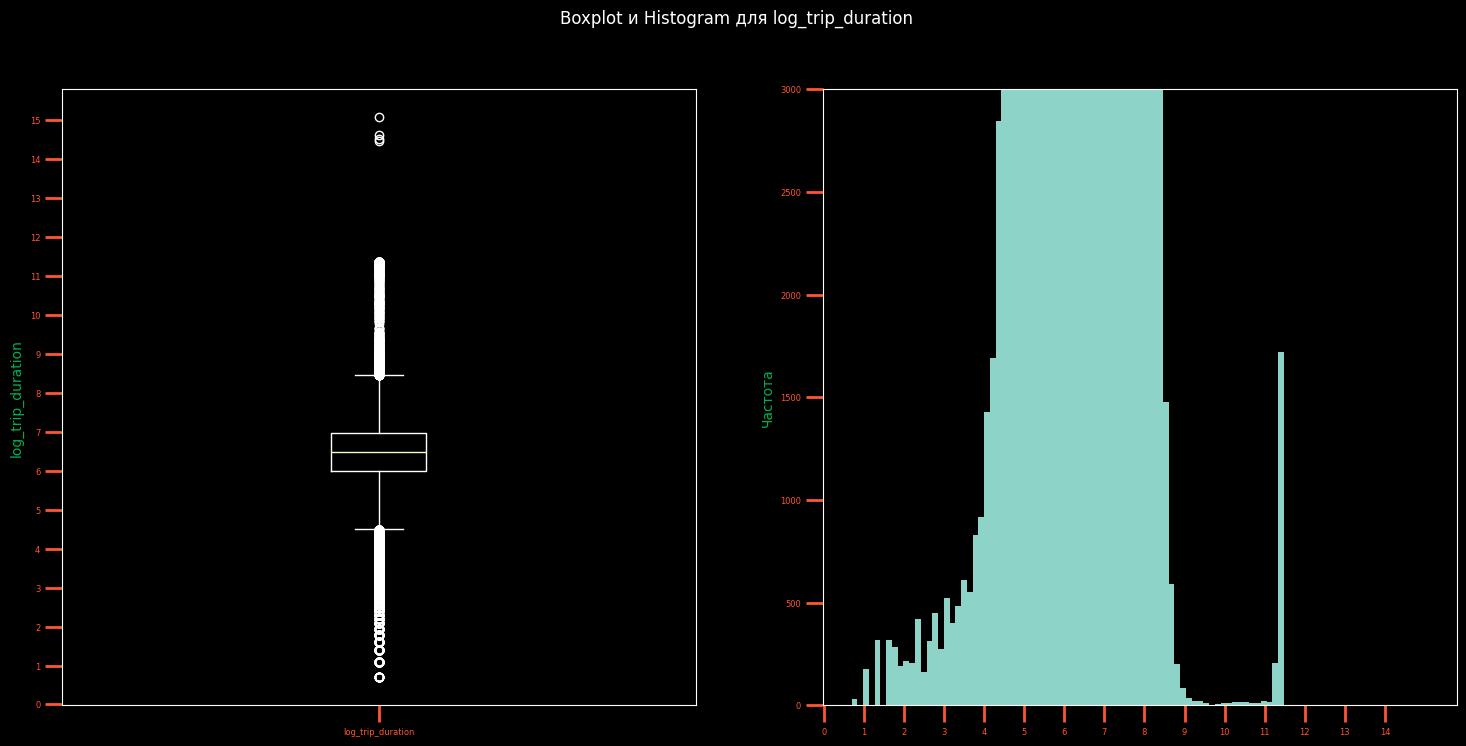

In [145]:
### Your code is here

fig = plt.figure()
fig.set_size_inches(18, 8)

plt.suptitle('Boxplot и Histogram для log_trip_duration')

plt.subplot(1, 2, 1)
plt.boxplot(data['log_trip_duration'].values)
plt.xticks([1], ['log_trip_duration'])  # передаем список значений и соответствующие им подписи
plt.yticks(range(0, int(max(data['log_trip_duration']))+1))
plt.ylabel('log_trip_duration')

plt.subplot(1, 2, 2)
plt.hist(data['log_trip_duration'], bins=100)
plt.xticks(range(0, int(max(data['log_trip_duration'])), 1))  # передаем список значений для оси x
plt.ylim(0, 3000)
plt.ylabel('Частота')

plt.show()


Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение;   топ 0,5% значение)

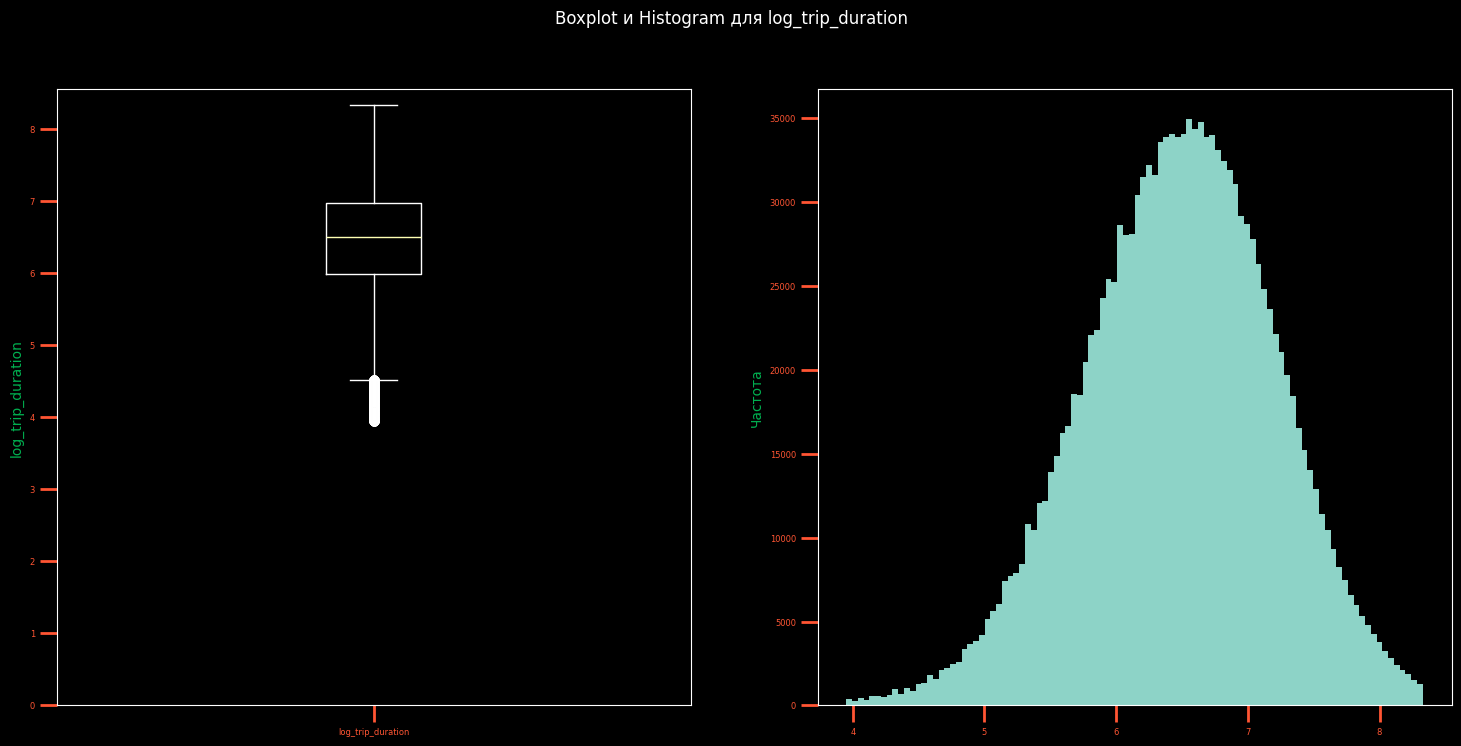

In [150]:
### Your code is here

df = data.copy()

q_high = df['log_trip_duration'].quantile(0.995)
q_low = df['log_trip_duration'].quantile(0.005)
df = df[(df['log_trip_duration'] > q_low) & (df['log_trip_duration'] < q_high)]

fig = plt.figure()
fig.set_size_inches(18, 8)

plt.suptitle('Boxplot и Histogram для log_trip_duration')

plt.subplot(1, 2, 1)
plt.boxplot(df['log_trip_duration'].values)
plt.xticks([1], ['log_trip_duration'])  # передаем список значений и соответствующие им подписи
plt.yticks(range(0, int(max(df['log_trip_duration']))+1))
plt.ylabel('log_trip_duration')

plt.subplot(1, 2, 2)
plt.hist(df['log_trip_duration'], bins=100)
plt.ylabel('Частота')

plt.show()


In [151]:
df.shape

(1444013, 41)

In [152]:
data.shape

(1458644, 41)

Снова замерьте качество на кросс-валидации, используя старый selector

In [153]:
### Your code is here

X = df.drop(columns=['log_trip_duration'], axis=1)
Y = df['log_trip_duration']

model = LinearRegression()

cv_results = cross_validate(model, X, Y, cv=selector, scoring='neg_mean_squared_error', return_train_score=False)

cross_val_error = np.mean(-cv_results['test_score'])

print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")


MSLE на Кросс-валидации: 0.35
